In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Employee_Performance.csv')

In [3]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


## Department wise performance

In [4]:
data['PerformanceRating'].unique()

array([3, 4, 2], dtype=int64)

In [5]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [6]:
emp_data = data.groupby('EmpDepartment')['PerformanceRating'].value_counts()

In [7]:
emp_data

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

In [8]:
emp_data = emp_data.groupby(level=0).apply(lambda x: round(100 * x/x.sum()))

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

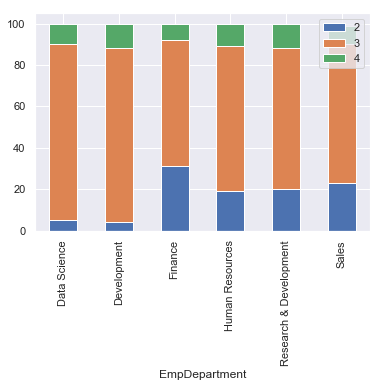

In [10]:
emp_data.unstack().plot(kind='bar', stacked=True)
plt.legend(loc='upper right')

## Top 3 import factor affecting employee performance

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

In [12]:
## map

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
labels = LabelEncoder()

In [15]:
data['EducationBackground'] = labels.fit_transform(data['EducationBackground'])

In [16]:
data['EducationBackground'].unique()

array([2, 1, 0, 3, 4, 5], dtype=int64)

In [17]:
labels.classes_

array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
       'Other', 'Technical Degree'], dtype=object)

In [18]:
data.drop('EmpNumber', axis = 1, inplace = True)

In [19]:
data.dtypes

Age                              int64
Gender                          object
EducationBackground              int32
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager             int64
Attrition                

In [20]:
data['Gender'] = labels.fit_transform(data['Gender'])

In [21]:
data['MaritalStatus'] = labels.fit_transform(data['MaritalStatus'])

In [22]:
data['EmpDepartment'] = labels.fit_transform(data['EmpDepartment'])

In [23]:
data['EmpJobRole'] = labels.fit_transform(data['EmpJobRole'])

In [24]:
data['BusinessTravelFrequency'] = labels.fit_transform(data['BusinessTravelFrequency'])

In [25]:
data['OverTime'] = labels.fit_transform(data['OverTime'])

In [26]:
data['Attrition'] = labels.fit_transform(data['Attrition'])

In [27]:
data.dtypes

Age                             int64
Gender                          int32
EducationBackground             int32
MaritalStatus                   int32
EmpDepartment                   int32
EmpJobRole                      int32
BusinessTravelFrequency         int32
DistanceFromHome                int64
EmpEducationLevel               int64
EmpEnvironmentSatisfaction      int64
EmpHourlyRate                   int64
EmpJobInvolvement               int64
EmpJobLevel                     int64
EmpJobSatisfaction              int64
NumCompaniesWorked              int64
OverTime                        int32
EmpLastSalaryHikePercent        int64
EmpRelationshipSatisfaction     int64
TotalWorkExperienceInYears      int64
TrainingTimesLastYear           int64
EmpWorkLifeBalance              int64
ExperienceYearsAtThisCompany    int64
ExperienceYearsInCurrentRole    int64
YearsSinceLastPromotion         int64
YearsWithCurrManager            int64
Attrition                       int32
PerformanceR

In [28]:
training_data = data.copy()

In [29]:
training_data.dtypes

Age                             int64
Gender                          int32
EducationBackground             int32
MaritalStatus                   int32
EmpDepartment                   int32
EmpJobRole                      int32
BusinessTravelFrequency         int32
DistanceFromHome                int64
EmpEducationLevel               int64
EmpEnvironmentSatisfaction      int64
EmpHourlyRate                   int64
EmpJobInvolvement               int64
EmpJobLevel                     int64
EmpJobSatisfaction              int64
NumCompaniesWorked              int64
OverTime                        int32
EmpLastSalaryHikePercent        int64
EmpRelationshipSatisfaction     int64
TotalWorkExperienceInYears      int64
TrainingTimesLastYear           int64
EmpWorkLifeBalance              int64
ExperienceYearsAtThisCompany    int64
ExperienceYearsInCurrentRole    int64
YearsSinceLastPromotion         int64
YearsWithCurrManager            int64
Attrition                       int32
PerformanceR

In [30]:
##numerical_columns = training_data.select_dtypes('int64').columns

In [31]:
##training_data = training_data[numerical_columns]

In [32]:
training_data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


In [33]:
training_data.drop('PerformanceRating', axis=1, inplace=True)

In [34]:
output_data = data['PerformanceRating']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X, x_test, Y, y_test = train_test_split(training_data, output_data,
                                       test_size=0.3, random_state=42)

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
model = DecisionTreeClassifier()

In [39]:
model.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
predictions = model.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [42]:
accuracy_score(y_test, predictions)

0.875

In [43]:
features = training_data.columns

In [44]:
from sklearn import tree

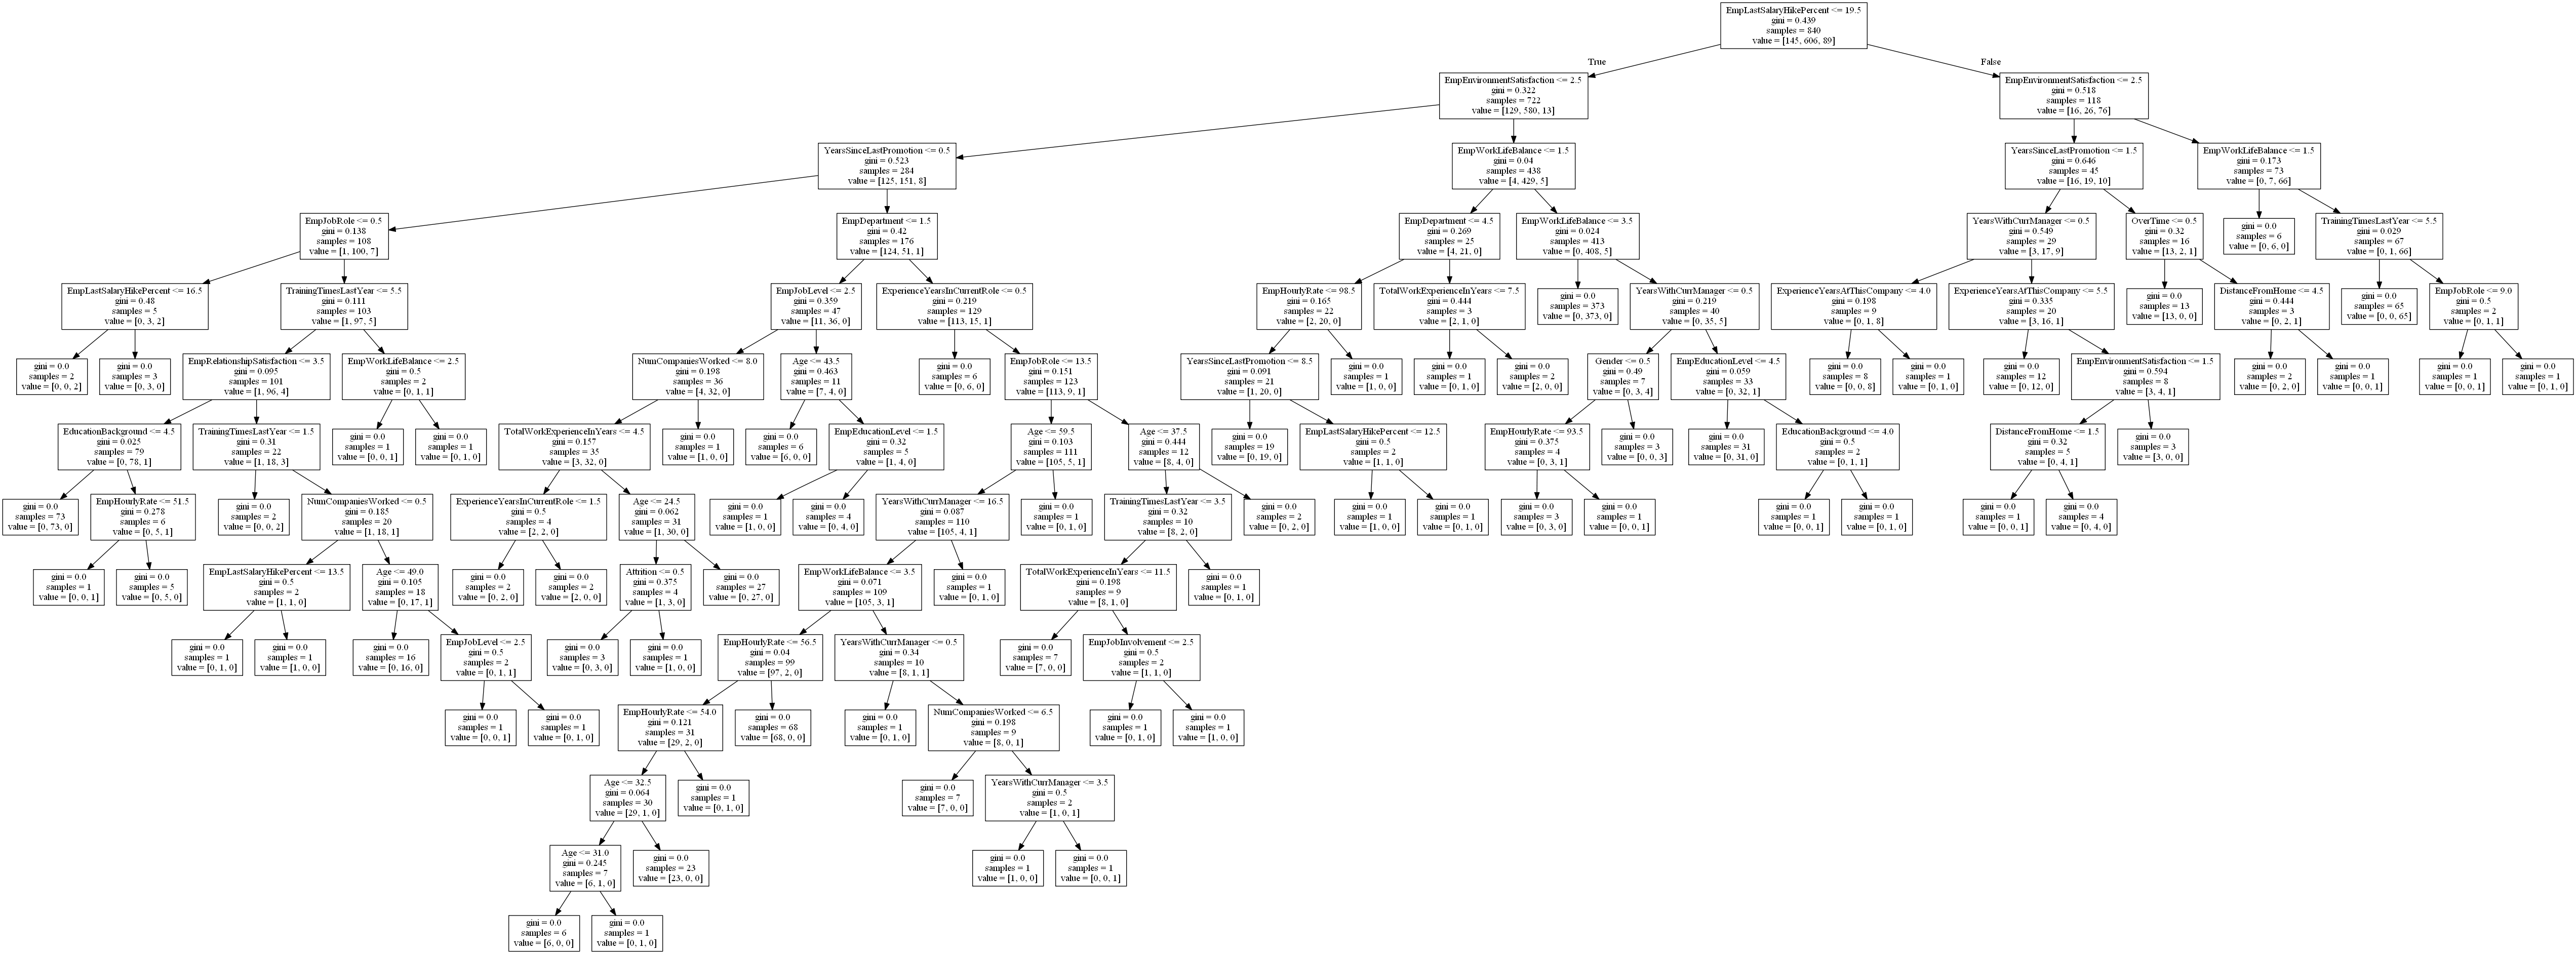

In [45]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(model, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Hiring-Decision.png")
Image(graph.create_png())  

In [46]:
data['EmpLastSalaryHikePercent'].describe()

count    1200.000000
mean       15.222500
std         3.625918
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: EmpLastSalaryHikePercent, dtype: float64

In [47]:
data['EmpLastSalaryHikePercent'].value_counts()

14    172
11    169
13    168
12    155
15     82
18     73
16     68
17     67
19     63
20     50
22     47
21     34
23     21
24     18
25     13
Name: EmpLastSalaryHikePercent, dtype: int64

In [48]:
salary_hike = data.groupby(['EmpLastSalaryHikePercent'])['PerformanceRating'].value_counts()

In [49]:
salary_hike_percent = salary_hike.groupby(level=0).apply(lambda x: round(100 * x/x.sum()))

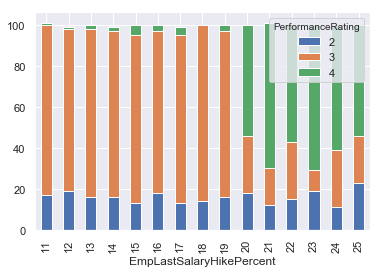

In [50]:
salary_hike_percent.unstack().plot(kind='bar', stacked=True)

In [51]:
data['EmpEnvironmentSatisfaction'].describe()

count    1200.000000
mean        2.715833
std         1.090599
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EmpEnvironmentSatisfaction, dtype: float64

In [52]:
data['EmpEnvironmentSatisfaction'].value_counts()

3    367
4    361
2    242
1    230
Name: EmpEnvironmentSatisfaction, dtype: int64

In [53]:
env_satisfaction = data.groupby(['EmpEnvironmentSatisfaction'])['PerformanceRating'].value_counts()

In [54]:
env_satisfaction_per = env_satisfaction.groupby(level=0).apply(lambda x: round(100 * x/x.sum()))

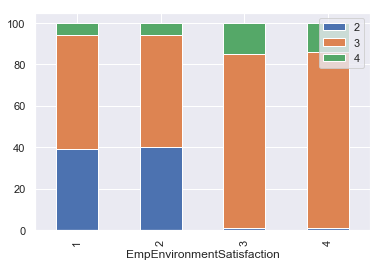

In [55]:
env_satisfaction_per.unstack().plot(kind='bar', stacked=True)
plt.legend(loc='upper right')

In [56]:
data.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [57]:
data['YearsSinceLastPromotion'].describe()

count    1200.000000
mean        2.194167
std         3.221560
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

In [58]:
data['YearsSinceLastPromotion'].unique()

array([ 0,  1, 12,  2,  3, 11,  7,  4,  5, 14,  8, 15,  6, 10, 13,  9],
      dtype=int64)

In [59]:
perf_year = data.groupby('YearsSinceLastPromotion')['PerformanceRating'].value_counts()

In [60]:
perf_year = perf_year.groupby(level = 0).apply(lambda x: round(100 *x/x.sum()))

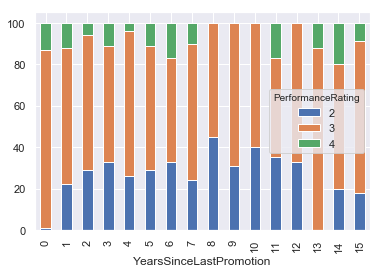

In [61]:
perf_year.unstack().plot(kind = 'bar', stacked = True)

In [62]:
data['EmpWorkLifeBalance'].describe()

count    1200.000000
mean        2.744167
std         0.699374
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: EmpWorkLifeBalance, dtype: float64

In [63]:
data['EmpWorkLifeBalance'].unique()

array([2, 3, 4, 1], dtype=int64)

In [64]:
bal_perf = data.groupby('EmpWorkLifeBalance')['PerformanceRating'].value_counts()

In [65]:
bal_perf = bal_perf.groupby(level = 0).apply(lambda x: round(100 * x/x.sum()))

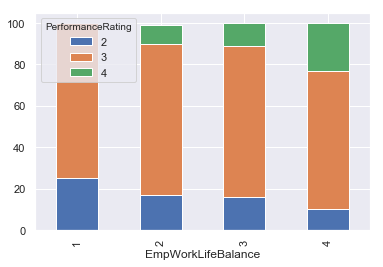

In [66]:
bal_perf.unstack().plot(kind = 'bar',stacked = True)

In [67]:
data1 = data.drop('Attrition', axis = 1)

In [68]:
data1

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,12,4,10,2,2,10,7,0,8,3
1,47,1,2,2,5,13,2,14,4,4,...,12,4,20,2,3,7,7,1,7,3
2,40,1,1,1,5,13,1,5,4,4,...,21,3,20,2,3,18,13,1,12,4
3,41,1,0,0,3,8,2,10,4,2,...,15,2,23,2,2,21,6,12,6,3
4,60,1,2,2,5,13,2,16,4,1,...,14,4,10,1,3,2,2,2,2,3
5,27,1,1,0,1,3,1,10,2,4,...,21,3,9,4,2,9,7,1,7,4
6,50,1,2,1,5,14,2,8,4,4,...,15,4,4,2,3,2,2,2,2,3
7,28,0,1,2,1,3,2,1,2,1,...,13,4,10,4,3,7,7,3,7,3
8,36,0,1,1,1,3,0,8,3,1,...,14,1,10,2,3,8,7,0,5,3
9,38,0,1,2,1,3,2,1,3,3,...,14,4,10,4,4,1,0,0,0,3


In [69]:
attrition = data['Attrition']

In [70]:
attrition

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       1
8       0
9       0
10      0
11      0
12      0
13      0
14      1
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      1
27      0
28      0
29      0
       ..
1170    0
1171    0
1172    0
1173    0
1174    0
1175    1
1176    0
1177    0
1178    0
1179    0
1180    0
1181    0
1182    0
1183    0
1184    0
1185    0
1186    0
1187    0
1188    1
1189    1
1190    0
1191    0
1192    0
1193    0
1194    0
1195    0
1196    0
1197    0
1198    0
1199    1
Name: Attrition, Length: 1200, dtype: int32

In [71]:
X1, x1_test, Y1, y1_test = train_test_split(data1, attrition,
                                       test_size=0.3, random_state=42)

In [72]:
model1 = DecisionTreeClassifier()

In [73]:
model1.fit(X1,Y1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
predictions1 = model1.predict(x1_test)

In [75]:
accuracy_score(y1_test,predictions1)

0.825

In [76]:
features1 = data1.columns

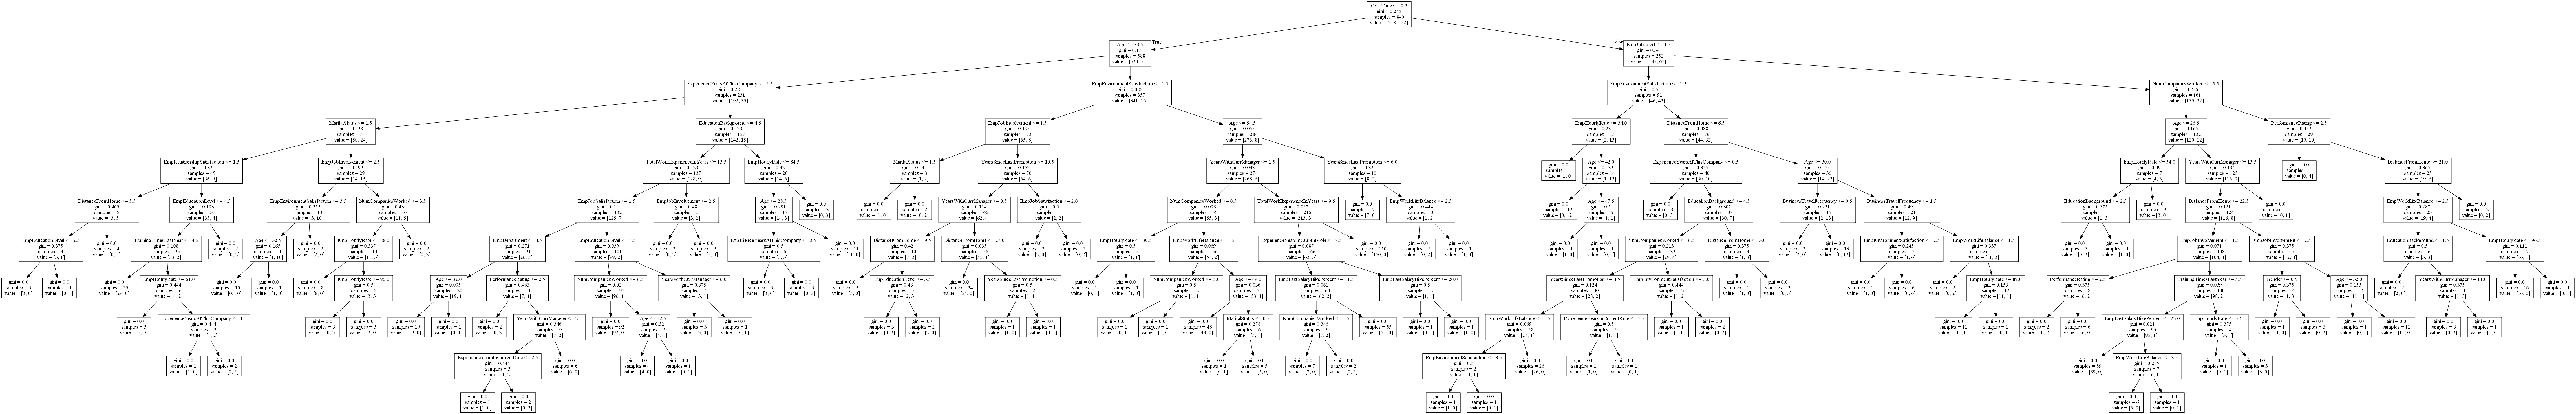

In [98]:
dot_data = StringIO()  
tree.export_graphviz(model1, out_file=dot_data,  
                         feature_names=features1)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Hiring-Decision.png")
Image(graph.create_png())  

In [78]:
data['OverTime'].describe()

count    1200.000000
mean        0.294167
std         0.455857
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: OverTime, dtype: float64

In [79]:
over_att = data.groupby('OverTime')['Attrition'].value_counts()

In [80]:
over_att = over_att.groupby(level = 0).apply(lambda x: round(100 * x/x.sum()))

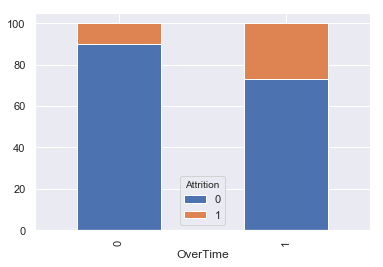

In [81]:
over_att.unstack().plot(kind = 'bar',stacked = True)

In [82]:
data['Age_cut'] = pd.cut(data['Age'], bins=[17, 25, 30, 39, 50, 60])

In [83]:
age_att = data.groupby('Age_cut')['Attrition'].value_counts()

In [84]:
age_att

Age_cut   Attrition
(17, 25]  0             64
          1             37
(25, 30]  0            164
          1             44
(30, 39]  0            405
          1             59
(39, 50]  0            289
          1             26
(50, 60]  0            100
          1             12
Name: Attrition, dtype: int64

In [85]:
age_att = age_att.groupby(level=0).apply(lambda x: round(100*x/x.sum()))

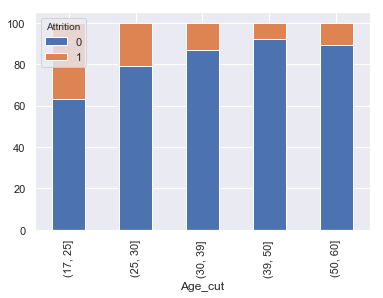

In [86]:
age_att.unstack().plot(kind='bar',stacked = True)

In [87]:
data['EmpJobLevel'].describe()

count    1200.000000
mean        2.067500
std         1.107836
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: EmpJobLevel, dtype: float64

In [88]:
emp_att = data.groupby('EmpJobLevel')['Attrition'].value_counts()

In [89]:
emp_att = emp_att.groupby(level = 0).apply(lambda x: round(100*x/x.sum()))

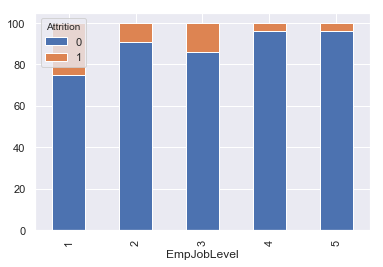

In [90]:
emp_att.unstack().plot(kind = 'bar',stacked = True)

In [91]:
#from sklearn.externals import joblib

In [92]:
#file = 'emphiring_performance.sav'

In [93]:
#joblib.dump(filename = file, value = model)

In [94]:
#file2 = 'emphiring_attrition.sav'

In [95]:
#joblib.dump(filename = file2, value = model1)

In [96]:
data1 = data[['EmpLastSalaryHikePercent','EmpEnvironmentSatisfaction','EmpWorkLifeBalance','PerformanceRating']]

In [97]:
data1.head()

,EmpLastSalaryHikePercent,EmpEnvironmentSatisfaction,EmpWorkLifeBalance,PerformanceRating
0,12,4,2,3
1,12,4,3,3
2,21,4,3,4
3,15,2,2,3
4,14,1,3,3
